# <font face="Trebuchet MS" size=6 color=black >COMP41680 Assignment 2
    

## <font face="Trebuchet MS" size=4 color=black >**Abstract:**

<font face="Trebuchet MS" size=2.5 color=black >    &emsp; &emsp; This assignment first mined the data provided by the link, then processed by text analysis, and finally classified by some machine learning methods to achieve text classification. The categories chosen are <font face="Trebuchet MS" size=2.5 color= green > cafe, hotel and restaurant.

## <font face="Trebuchet MS" size=4 color=black >**Task description:**

<font face="Trebuchet MS" size=2.5 color=black > Task 1 : Mining data from the link provided.

<font face="Trebuchet MS" size=2.5 color=black > Task 2 : Text analysis processing.

<font face="Trebuchet MS" size=2.5 color=black > Task 3 : Model training and choosing.

<font face="Trebuchet MS" size=2.5 color=black > Task 4 : evaluation processing.

## <font face="Trebuchet MS" size=4 color=black >**Task 1: Mining data from the link provided:**

In [40]:
# the library needed
import requests
import pandas as pd
from bs4 import BeautifulSoup

### <font face="Trebuchet MS" size=4 color=black > 1.1 module function description

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; module 1 : Grab the hyperlink of category by BeautifulSoup.

In [41]:
def Initial1_ParseHtml(url):
    f0 = requests.get(url)
    f0_html = f0.content.decode('utf-8')
    f0Soup = BeautifulSoup(f0_html, "html.parser")
    return f0Soup

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; module 2 : Parse the web from category link and get business link.

In [42]:
def Initial2_CateProcess(category):
    Dict = {}
    f0Soup = Initial1_ParseHtml(url)
    for element in f0Soup.find_all('h4'):
        Dict[element.a.text.split(': ')[1]] = url + element.a['href']
    return Dict[category]

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; module 3 : Parse the web from business link and get store link.

In [43]:
def Initial3_NameProcess(category_url):
    new_url = []
    f1_Soup = Initial1_ParseHtml(category_url)
    for element in f1_Soup.find_all('h5'):
        new_url.append(url + element.a['href'] )
    return new_url

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; module 4 & 5 : store the review of customers and judgement into the CSV files.

In [44]:
def Initial4_load(Final_Soup, path, head_count):
    stars = []
    evaluations = []
    for element in Final_Soup.find_all('div', {'class': "review"}):
        a = int(element.p.next_sibling.img['alt'][0])
        
        # if the num of stars is larger than 3, treat it as the positive review
        
        if (a > 3):
            stars.append(1)
            
        # less than 3 , as the negative 
        
        else:
            stars.append(0)
        evaluation = element.p.next_sibling.next_sibling.text
        evaluations.append(evaluation)
    Csv_store(path, evaluations, stars, head_count)
            
# Store into csv files

def Csv_store(path, evaluations, stars, head_count):
    df = pd.DataFrame()
    df['evaluation'] = evaluations
    df['stars'] = stars
    if(head_count == 0):
        df.to_csv(path , index = 0)
    else:
        df.to_csv(path, mode = 'a', index = 0, header = 0)

### <font face="Trebuchet MS" size=4 color=black > 1.2 Web data mining implementation

<font face="Trebuchet MS" size=2.5 color=green >&emsp; &emsp; The categories chosen are cafes, hotels and restaurants. <font face="Trebuchet MS" size=2.5 color=black > In addition, explain the details about the processing of cafe category, the other two are similar.

 <font face="Trebuchet MS" size=2.5 color=black > The data mining from cafe category

In [45]:
# the link provided and file path
url = 'http://mlg.ucd.ie/modules/yalp/'       
path1 = 'cafes.csv'

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Firstly, get the category link 

In [46]:
category_url = Initial2_CateProcess('Cafes')
print(category_url)

http://mlg.ucd.ie/modules/yalp/cafes_list.html


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;Secondly, the store names link 

In [47]:
store_name_url = Initial3_NameProcess(category_url)
for i in range(0, 5):
    print (store_name_url[i])
    
# Considering the reading experience, five links are enough

http://mlg.ucd.ie/modules/yalp/review_set_semizMsHqDfT_kOXQITSOA.html
http://mlg.ucd.ie/modules/yalp/review_set_WWTQUb_NUAd5Q_k7jq2r0A.html
http://mlg.ucd.ie/modules/yalp/review_set_6Or07nY9iiSSJf-Kaf0GMw.html
http://mlg.ucd.ie/modules/yalp/review_set_4l5SRJkmjrRkYVxWNVwFsg.html
http://mlg.ucd.ie/modules/yalp/review_set_TpwCjlKsdYjLsvlYhKGt4g.html


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;Thirdly, store the reviews into CSV file

In [48]:
head_count = 0  # This reference is used for avoiding the overlap of heading in csv files
for url in store_name_url:
    Cafe_Soup = Initial1_ParseHtml(url)
    Initial4_load(Cafe_Soup, path1, head_count)
    head_count = head_count + 1
    
df_cafe = pd.read_csv(path1)
print(df_cafe.head())

                                          evaluation  stars
0  Pros: Lots of items you would not expect from ...      1
1  Best egg-tarts in town! There's really not muc...      1
2  I've been to ABC Bakery a few times since I re...      0
3  FYI, Closed Monday's New ownership for about 1...      0
4  The inside may not look like much but they mak...      1


<font face="Trebuchet MS" size=2.5 color=black > The data mining from hotel category

In [49]:
url = 'http://mlg.ucd.ie/modules/yalp/'
path2 = 'Hotels.csv'
head_count = 0
category_url = Initial2_CateProcess('Hotels')
for url in Initial3_NameProcess(category_url):
    Hotels_Soup = Initial1_ParseHtml(url)
    Initial4_load(Hotels_Soup, path2, head_count)
    head_count = head_count + 1

<font face="Trebuchet MS" size=2.5 color=black >The data mining from restaurant category

In [50]:
url = 'http://mlg.ucd.ie/modules/yalp/'
path3 = 'Restaurants.csv'
head_count = 0
category_url = Initial2_CateProcess('Restaurants')
for url in Initial3_NameProcess(category_url):
    Hotels_Soup = Initial1_ParseHtml(url)
    Initial4_load(Hotels_Soup, path3, head_count)  
    head_count = head_count + 1

## <font face="Trebuchet MS" size=4 color=black >**Task 2 : Text analysis processing.:**

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; In text analysis, text preprocessing is necessary.In this chapter, we use the tokenisation, stemming, lemmatisation and stopword removing for text pretreatment.Tf-idf is used to measure word frequency. The reasons for using these methods will be discussed later, but in any case, there is no doubt that these methods will make word processing better.

In [51]:
# Libraries neede and file loaded
import pandas as pd
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer


path1 = 'cafes.csv'
path2 = 'Hotels.csv'
path3 = 'Restaurants.csv'

df_cafe = pd.read_csv(path1)
df_hotel = pd.read_csv(path2)
df_Res = pd.read_csv(path3)

### <font face="Trebuchet MS" size=4 color=black > 2.1 Tokennisation, stemming, lemmatisation and stopword removing

<font face="Trebuchet MS" size=2.5 color=black > Tokenisation used for words splitting  
    Stemming used for recognising variations of the same stem or root <font face="Trebuchet MS" size=2.5 color=green > ( fish~ for fishes, fishing...)  
    <font face="Trebuchet MS" size=2.5 color=black >lemmatising used for grouping different inflected forms of a word so they can be analysed as a single stem  <font face="Trebuchet MS" size=2.5 color=green >( woman and women... )  
    <font face="Trebuchet MS" size=2.5 color=black >Stopword removing is pretty neccessary. The removing of these redundant words<font face="Trebuchet MS" size=2.5 color=green > ( the , for, is ...)<font face="Trebuchet MS" size=2.5 color=black >would improve the performance of training model and save time of words frequency processing <font face="Trebuchet MS" size=2.5 color=green>(tf-idf)  
        <font face="Trebuchet MS" size=2.5 color=black > Punctuations are similiar as the stopwords, redundant and useless, it is good for next processing if droping them out.

In [52]:
def text_proprocess(df):
    suggestions = []
    stemmer = SnowballStemmer('english')
    wn = nltk.WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) 
    for evaluation in df.evaluation:
        suggestion = []
        tokens = nltk.word_tokenize(evaluation)
        for word in tokens:
            # Stop words removing
            if word not in stop_words:
                # replace punctuation
                fix1_word = re.sub(r'[^a-zA-Z0-9]', " ", word)
                # Stemming processing
                fix2_word = stemmer.stem(fix1_word)
                # Lemmatisation processing
                fix3_word = wn.lemmatize(fix2_word)
                if(fix3_word != " "):
                    suggestion.append(fix3_word.lower())
        listToStr = ' '.join([str(elem) for elem in suggestion])
        suggestions.append(listToStr)
    df = df.assign(evaluation = suggestions)
    return df

df_cafe = text_proprocess(df_cafe)
df_hotel = text_proprocess(df_hotel)
df_Res = text_proprocess(df_Res)

print (df_cafe.head())

                                          evaluation  stars
0  pro lot item would expect chine bakeri friend ...      1
1  best egg tart town there  s realli much say ho...      1
2  i  ve abc bakeri time sinc i read one top plac...      0
3  fyi close monday  s new ownership 10 week new ...      0
4  the insid may look like much make mean egg tar...      1


### <font face="Trebuchet MS" size=4 color=black >2.2 Tf-idf processing

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;  tf-idf would reflect the importance of word rather than the counting frequency. in general, Some words appear sparingly but are useful for analysis (perfect, fnatastic...).Some words come up all the time but don't help us in our analysis (go ,see ...)

In [53]:
def Freq_process(df):
    vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))
    dimension = vectorizer.fit_transform(df.evaluation).toarray()
    return dimension

dimension = Freq_process(df_cafe)
print(dimension.shape)

(2000, 4243)


## <font face="Trebuchet MS" size=4 color=black > Task 3 : Model training and choosing.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; There are three sorts of training model provided : Naive Bayes, Logistic Regression, Random Forest. Try to find out which of the three models is more suitable for these three data sets.To prevent overfitting, we used cross validation.

In [54]:
# Libraries needed:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# This package just is used for removing redundant alarms and has no actual effect on the program
from warnings import simplefilter 

### <font face="Trebuchet MS" size=4 color=black > 3.1 Cross validation

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;  This module function is used for cross validation. The number of K chosen is 10. 

In [55]:
def cross_validation(model, df, count):
      List = []
      if(count == 0):
          model_name = 'Naive Bayes'
      elif(count == 1):
          model_name = 'Random Forest'
      elif(count == 2):
          model_name = 'Logistic Regression'
      accuracies = cross_val_score(model, Freq_process(df), df.stars, scoring='accuracy', cv=10)
      for _id , accuracy in enumerate(accuracies):
          List.append((model_name,_id, accuracy))
      return List

###  <font face="Trebuchet MS" size=4 color=black > 3.2 Model choosing

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; This function outputs the accuracy of each model to compare performance

In [56]:
def classify_process(df):
    models = [GaussianNB(),
              RandomForestClassifier(n_estimators=150, max_depth=3, random_state=0),
              LogisticRegression()]
    interface = []
    count = 0
    validation_table = pd.DataFrame(index = range(10 * 3))
    for model in models:
        interface = interface + cross_validation(model, df, count)
        count = count + 1
    validation_table = pd.DataFrame(interface)
    validation_table.columns = ['model name', '_id', 'accuracy']
    print(validation_table.groupby('model name').accuracy.mean())

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Printing out the results. Theoretically, logistic regression should have better results, because the target can be regarded as a binary number, which is more suitable for logistic regression model.

In [57]:
simplefilter(action='ignore', category=FutureWarning)
 
classify_process(df_cafe)
classify_process(df_hotel)
classify_process(df_Res)

model name
Logistic Regression    0.832546
Naive Bayes            0.710022
Random Forest          0.731002
Name: accuracy, dtype: float64
model name
Logistic Regression    0.886950
Naive Bayes            0.754077
Random Forest          0.644463
Name: accuracy, dtype: float64
model name
Logistic Regression    0.858984
Naive Bayes            0.681997
Random Forest          0.623011
Name: accuracy, dtype: float64


<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;The results fit our prediction. Therefore, we choose the Logistic Regression as our training model.

##  <font face="Trebuchet MS" size=4 color=black > Task 4 :  evaluation processing.

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; We need to train model by one dataset and evaluate on other two datasets. In order to implementation this, we combine the datasets tested and evaluated and use train_test_split package to divided the dataset combiend into the training dataset and testing dataset at the junction of these two datasets.  
    &emsp; &emsp; we need to set the shuffle reference as the False, nor we can't split the two datasets perfectly.

In [58]:
# libraries needed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from sklearn import metrics
import numpy as np

###   <font face="Trebuchet MS" size=4 color=black > 4.1 evluation method

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Confusion matrix would show the total result vividly. Besides the precision and f1 score also are given to measure the performance of model

In [59]:
def ConfusionMatrix(df1, df2, model):
    df_copy1 = df1
    df_copy2 = df2
    new_df = pd.concat([df_copy1,df_copy2])
    split_point = len(df_copy1.index)/len(new_df.index)
    tf_idf = Freq_process(new_df)
    x_train, x_test, y_train, y_test = train_test_split(tf_idf, new_df.stars, 
                                       train_size=split_point, shuffle=False)
    model.fit(x_train, y_train)
    cm = pd.crosstab(y_test, model.predict(x_test),
         rownames=['Actual'], colnames=['Predicted'])
    matplotlib.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(8,8))
    sn.heatmap(cm / np.sum(cm), annot=True,  fmt='.2%')
    plt.title("Confusion matrix",fontsize=15)
    plt.rcParams.update({'font.size': 19})
    plt.show()
    y_pred = model.predict(x_test)
    new_df.stars = new_df.stars.astype(str)
    print(metrics.classification_report(y_test, y_pred, target_names=new_df['stars'].unique()))

###   <font face="Trebuchet MS" size=4 color=black > 4.1 Results discussion

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;  Training model by Cafe category, then evaluating on Hotel and Restaurant.

Training_model by dataset cafe, evaluation on dataset hotel


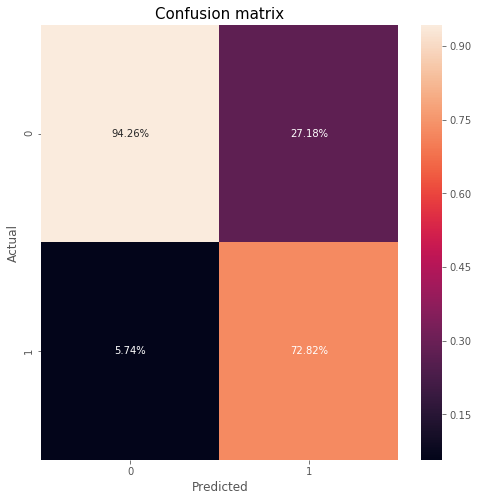

              precision    recall  f1-score   support

           1       0.94      0.48      0.63       824
           0       0.73      0.98      0.84      1176

   micro avg       0.77      0.77      0.77      2000
   macro avg       0.84      0.73      0.73      2000
weighted avg       0.82      0.77      0.75      2000

Training_model by dataset cafe, evaluation on dataset restaurant


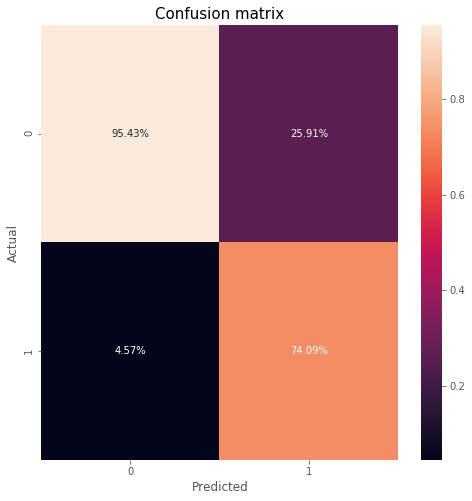

              precision    recall  f1-score   support

           1       0.95      0.52      0.68       838
           0       0.74      0.98      0.84      1162

   micro avg       0.79      0.79      0.79      2000
   macro avg       0.85      0.75      0.76      2000
weighted avg       0.83      0.79      0.77      2000



In [60]:
model = LogisticRegression()
print("Training_model by dataset cafe, evaluation on dataset hotel")
ConfusionMatrix(df_cafe, df_hotel, model)
print("Training_model by dataset cafe, evaluation on dataset restaurant")
ConfusionMatrix(df_cafe, df_Res, model)

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; The logistic Regression did a very great job on the dintinguish on negative review, for positive review, it is acceptable. However, it is hard to see the performance of training model is not good at the learning of positive review, because it works on another dataset. It can only be said that when using Cafe category as the training model, it is more suitable for judging the negative review of other data sets. After all, from the perspective of the results, the relevant indicators of positive reviwe are not bad

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;  Training model by Hotel category, then evaluating on Cafe and Restaurant.

Training_model by dataset hotel, evaluation on dataset cafe


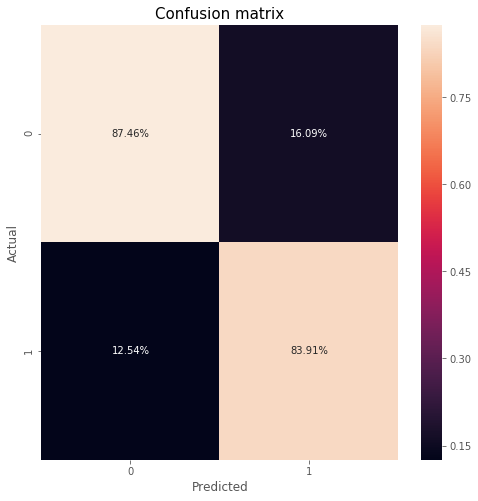

              precision    recall  f1-score   support

           1       0.87      0.49      0.63       538
           0       0.84      0.97      0.90      1462

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.86      0.73      0.77      2000
weighted avg       0.85      0.84      0.83      2000

Training_model by dataset hotel, evaluation on dataset restaurant


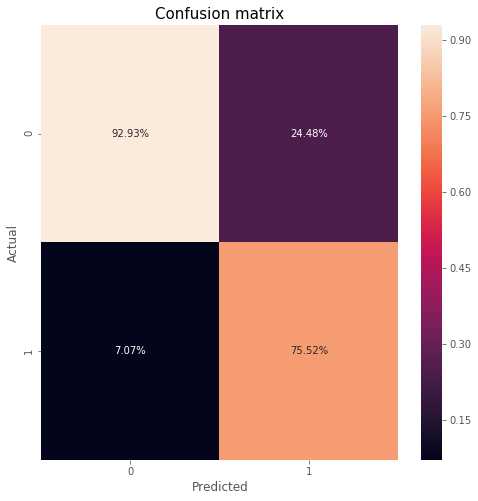

              precision    recall  f1-score   support

           1       0.93      0.56      0.70       838
           0       0.76      0.97      0.85      1162

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.84      0.77      0.78      2000
weighted avg       0.83      0.80      0.79      2000



In [61]:
print("Training_model by dataset hotel, evaluation on dataset cafe")
ConfusionMatrix(df_hotel, df_cafe, model)
print("Training_model by dataset hotel, evaluation on dataset restaurant")
ConfusionMatrix(df_hotel, df_Res, model)

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; When the hotel category is used as the training model, it is more suitable for evaluating cafe category. No matter whether it is postive review or negative review, the index results are good.When applied to restaurant caregory, negative reviwe came out very well and positive review came out poorly

Training_model by dataset restaurant, evaluation on dataset cafe


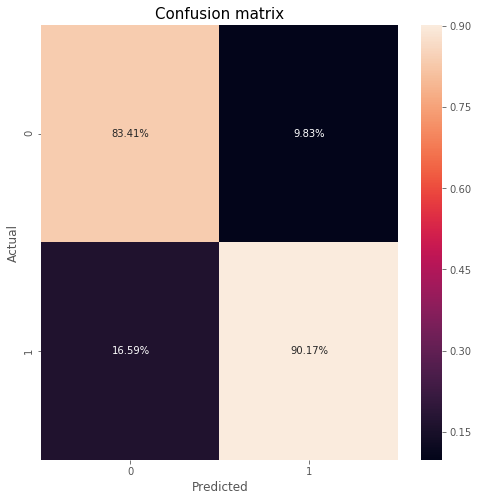

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       538
           1       0.90      0.95      0.92      1462

   micro avg       0.89      0.89      0.89      2000
   macro avg       0.87      0.83      0.85      2000
weighted avg       0.88      0.89      0.88      2000

Training_model by dataset restaurant, evaluation on dataset hotel


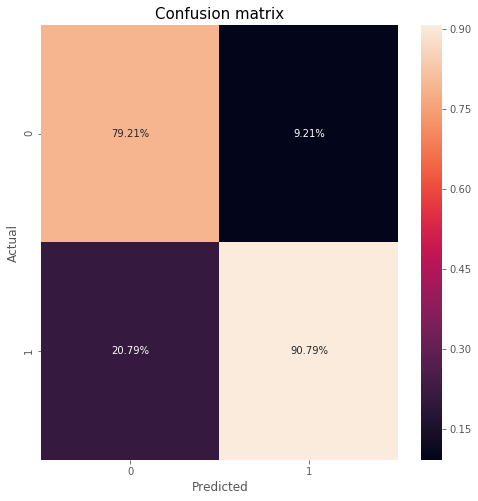

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       824
           1       0.91      0.84      0.87      1176

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.86      0.85      0.86      2000



In [62]:
print("Training_model by dataset restaurant, evaluation on dataset cafe")
ConfusionMatrix(df_Res,df_cafe, model)
print("Training_model by dataset restaurant, evaluation on dataset hotel")
ConfusionMatrix(df_Res, df_hotel, model)

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp;When restaurant category is used as a training model, its effect is very good, whether it is F1 score, recall or precision. However, it cannot be said that its data set is the best, but it is more suitable for training model for cafe and hotel.

## <font face="Trebuchet MS" size=4 color=black > Conclusion:

<font face="Trebuchet MS" size=2.5 color=black >&emsp; &emsp; Although the results are not perfect, they are good because there are differences between different data sets.I think that the pretreatment of the text analysis is critical, in this assignment, use a lot of this aspect of the method (lemmetisation, stemming, punctuation) o...This is very similar to machine leaning. If you want to get a high accuracy, the data preprocessing is very important. A good dataset can achieve twice the result with half the effort than the superb technology.